<a href="https://colab.research.google.com/github/Ankan1998/Text-GCN/blob/main/text_gcn_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Importing dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
len(newsgroups_train.data)

11314

## Reducing Dataset

### Reduced dataset or else RAM is overflowing

In [ ]:
newsgroups_train.data=newsgroups_train.data[:100]


In [ ]:
y=newsgroups_train.target[:100]

In [ ]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## Cleaning Dataset

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

re_url = re.compile(r'(?:http|ftp|https)://(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
re_email = re.compile('(?:[a-z0-9!#$%&\'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&\'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9]))\.){3}(?:(2(5[0-5]|[0-4][0-9])|1[0-9][0-9]|[1-9]?[0-9])|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])')

In [ ]:
def clean_header(text):
    text = re.sub(r'(From:\s+[^\n]+\n)', '', text)
    text = re.sub(r'(Subject:[^\n]+\n)', '', text)
    text = re.sub(r'(([\sA-Za-z0-9\-]+)?[A|a]rchive-name:[^\n]+\n)', '', text)
    text = re.sub(r'(Last-modified:[^\n]+\n)', '', text)
    text = re.sub(r'(Version:[^\n]+\n)', '', text)

    return text



In [ ]:
for i in range(len(newsgroups_train.data)):
  newsgroups_train.data[i]=clean_header(newsgroups_train.data[i])

In [ ]:
def clean_text(text):        
    text = text.lower()
    text = text.strip()
    text = re.sub(re_url, '', text)
    text = re.sub(re_email, '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'(\d+)', ' ', text)
    text = re.sub(r'(\s+)', ' ', text)
    
    return text



In [ ]:
for i in range(len(newsgroups_train.data)):
  newsgroups_train.data[i]=clean_text(newsgroups_train.data[i])

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def rem_stopwords(dataset,stop_words):
  for i in range(len(dataset)):
    temp=[]
    for word in dataset[i].split(" "):
      
      if word not in stop_words:
        temp.append(word)
    p=" ".join(temp)
    dataset[i]=p
  return dataset

In [ ]:
newsgroups_train.data=rem_stopwords(newsgroups_train.data,stop_words)

In [ ]:
type(newsgroups_train.data)

list

In [ ]:
l=[]
for i in newsgroups_train.data:
  l.extend(list(set(i.split(" "))))
a=list(set(l))

In [ ]:
len(sorted(a))

# **GCN preprocessing**

## TFIDF Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Top 5k features are taken
vectorizer = TfidfVectorizer(input="content",max_features=5000)
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [ ]:
vectors

<100x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 10286 stored elements in Compressed Sparse Row format>

In [ ]:
df_tfidf = vectors.toarray()
top_words = vectorizer.get_feature_names()
top_words = np.array(top_words)
df_tfidf = pd.DataFrame(df_tfidf,columns=top_words)

In [ ]:
df_tfidf

,aario,ab,abad,abandoned,abdomens,abilene,able,ables,aboard,abode,abp,abpsoft,abraham,abs,absolute,abstract,absurd,abuse,abuses,academy,accel,acceleration,acceptance,accepted,access,accessdigexnet,accessed,accessible,accessories,accessory,accident,accidental,accidentally,accidents,accommodation,accompanied,accompanying,accomplish,account,accounts,...,ye,yea,yeah,year,yearly,years,yehiam,yellow,yep,yerevan,yes,yesterday,yet,yhwh,yo,yoke,york,yoshiro,youd,youll,young,younger,youre,youve,yrs,ysebaert,zangezour,zangibasar,zazula,zealand,zeikheil,zenier,zero,zilkade,zod,zone,zoologists,zoom,zuma,zx
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.096823,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08584,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.09526,0.0,0.084083,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.041431,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.169487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Point-wise Mutual Information

In [ ]:
from collections import OrderedDict
from tqdm import tqdm

In [ ]:
### PMI between words
window = 100 # sliding window size to calculate point-wise mutual information between words
names = top_words
ncount  = OrderedDict((name, 0) for name in names)
word_index = OrderedDict((name,index) for index,name in enumerate(names))


In [ ]:
occ = np.zeros( (len(names),len(names)) ,dtype=np.int32)

In [ ]:
# Find the co-occurrences:
# Will take huge tim, so saved as .npy file
from itertools import combinations
no_windows = 0
# taking each data from dataset
for l in tqdm(newsgroups_train.data,total=len(newsgroups_train.data)):
    # Iterating over each word in the line "l"
    for i in range(len(l.split(" "))-window):
        # Counting windows
        no_windows += 1
        # Getting unique words within the window
        d = set(l.split(" ")[i:(i+window)])
        d=d.intersection(set(names))
        # Counting occurrences of each word on whole document "ncount"
        for w in d:
            ncount[w] += 1
        # Combination of two words 
        for w1,w2 in combinations(d,2):
            i1 = word_index[w1]
            i2 = word_index[w2]
            # Counting word-word
            occ[i1][i2] += 1
            occ[i2][i1] += 1
    

100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


In [ ]:
#c=np.load("/content/drive/MyDrive/Jobs Assignment/Allied Media/Final Folder/Allied Media.npy")

In [ ]:
#occ=c

In [ ]:
#names=np.load("/content/drive/MyDrive/Jobs Assignment/Allied Media/Final Folder/Allied Media_top_words500.npy")

In [ ]:
names.shape

(5000,)

In [ ]:
# convert to PMI
import math
#no_windows=20
p_i_j = pd.DataFrame(occ, index = names,columns=names)/no_windows
p_i = pd.Series(ncount, index=ncount.keys())/no_windows

In [ ]:
p_i


aario         0.003174
ab            0.000000
abad          0.003030
abandoned     0.014428
abdomens      0.014428
                ...   
zone          0.010532
zoologists    0.003174
zoom          0.003751
zuma          0.000577
zx            0.001299
Length: 5000, dtype: float64

In [ ]:
for col in p_i_j.columns:
    p_i_j[col] = p_i_j[col]/p_i[col]
for row in p_i_j.index:
    p_i_j.loc[row,:] = p_i_j.loc[row,:]/p_i[row]
p_i_j = p_i_j + 1E-9
for col in p_i_j.columns:
    p_i_j[col] = p_i_j[col].apply(lambda x: math.log(x))

In [ ]:
def nCr(n,r):
    f = math.factorial
    return int(f(n)/(f(r)*f(n-r)))

In [ ]:
from itertools import combinations
def word_word_edges(p_i_j):
    word_word = []
    cols = list(p_i_j.columns)
    cols = [str(w) for w in cols]
    for w1, w2 in tqdm(combinations(cols, 2), total=nCr(len(cols), 2)):
        if (p_i_j.loc[w1,w2] > 0):
            word_word.append((w1,w2,{"weight":p_i_j.loc[w1,w2]}))
    return word_word

In [ ]:
word_word_edges(p_i_j)

100%|██████████| 12497500/12497500 [02:01<00:00, 102895.64it/s]


[('aario', 'able', {'weight': 2.754210728186612}),
 ('aario', 'actually', {'weight': 2.5158225982695863}),
 ('aario', 'allah', {'weight': 5.059569748006072}),
 ('aario', 'ancient', {'weight': 3.846547108175223}),
 ('aario', 'another', {'weight': 2.0638374745726984}),
 ('aario', 'anything', {'weight': 2.136024216539684}),
 ('aario', 'applies', {'weight': 3.6962649051293477}),
 ('aario', 'atom', {'weight': 5.752716928562843}),
 ('aario', 'atoms', {'weight': 5.752716928562843}),
 ('aario', 'based', {'weight': 2.5596252209245165}),
 ('aario', 'beyond', {'weight': 3.8198788610936387}),
 ('aario', 'call', {'weight': 3.6234035568663514}),
 ('aario', 'cannot', {'weight': 3.2678102788097583}),
 ('aario', 'certain', {'weight': 3.7623550169567506}),
 ('aario', 'comprehend', {'weight': 4.890493417963307}),
 ('aario', 'comprised', {'weight': 3.6555758098062787}),
 ('aario', 'concept', {'weight': 4.972558371017019}),
 ('aario', 'concepts', {'weight': 4.972558371017019}),
 ('aario', 'continuous', {'w

In [ ]:
def load_pickle(filename):

    with open(filename, 'rb') as pkl_file:
        data = pickle.load(pkl_file)
    return data

def save_as_pickle(filename, data):
    with open(filename, 'wb') as output:
        pickle.dump(data, output)


In [ ]:
import networkx as nx
### Build graph
G = nx.Graph()
G.add_nodes_from(df_tfidf.index) ## document nodes
G.add_nodes_from(top_words) ## word nodes
### build edges between document-word pairs
document_word = [(doc,w,{"weight":df_tfidf.loc[doc,w]}) for doc in df_tfidf.index for w in df_tfidf.columns]
G.add_edges_from(document_word)
### build edges between word-word pairs
word_word = word_word_edges(p_i_j)
G.add_edges_from(word_word)

100%|██████████| 12497500/12497500 [02:00<00:00, 103906.84it/s]


In [ ]:
import pickle
save_as_pickle("/content/drive/MyDrive/Jobs Assignment/Allied Media/Final Folder/doc_graph500.pkl", G)

In [ ]:
# Adjaceny matrix of G
A = nx.to_numpy_matrix(G, weight="weight") 
# A=A+I
A = A + np.eye(G.number_of_nodes())
# Creating degree matrix
degrees = []
for d in G.degree(weight=None):
    if d == 0:
        degrees.append(0)
    else:
        degrees.append(d[1]**(-0.5))
degrees = np.diag(degrees)
X = np.eye(G.number_of_nodes()) # Features are just identity matrix
# Normalized Laplacian 
A_hat = degrees@A@degrees
f = X 


In [ ]:
A_hat.shape

(5100, 5100)

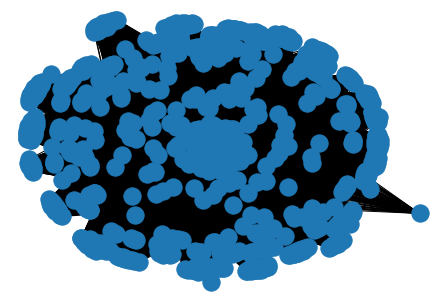

In [ ]:
nx.draw(G)

## Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class graph_conv_net(nn.Module):
    def __init__(self, X_size, A_hat, hidden_size_1,hidden_size_2,num_classes, bias=True): # X_size = num features
        super(gcn, self).__init__()
        # Changing to torch tensor
        self.A_hat = torch.tensor(A_hat, requires_grad=False).float()
        # Adding weight layer
        self.weight = nn.parameter.Parameter(torch.FloatTensor(X_size, hidden_size_1))
        var = 2./(self.weight.size(1)+self.weight.size(0))
        self.weight.data.normal_(0,var)
        self.weight2 = nn.parameter.Parameter(torch.FloatTensor(hidden_size_1, hidden_size_2))
        var2 = 2./(self.weight2.size(1)+self.weight2.size(0))
        self.weight2.data.normal_(0,var2)
        if bias:
            self.bias = nn.parameter.Parameter(torch.FloatTensor(hidden_size_1))
            self.bias.data.normal_(0,var)
            self.bias2 = nn.parameter.Parameter(torch.FloatTensor(hidden_size_2))
            self.bias2.data.normal_(0,var2)
        else:
            self.register_parameter("bias", None)
        self.fc1 = nn.Linear(hidden_size_2, num_classes)
        
    def forward(self, X): 
        # multiplying with layer1
        X = torch.mm(X, self.weight)
        if self.bias is not None:
            X = (X + self.bias)
        X = F.relu(torch.mm(self.A_hat, X))
        # multiplying with layer2
        X = torch.mm(X, self.weight2)
        if self.bias2 is not None:
            X = (X + self.bias2)
        X = F.relu(torch.mm(self.A_hat, X))
        X = self.fc1(X)
        return X

In [ ]:
net = graph_conv_net(X.shape[1], A_hat, hidden_layer_1=100,hidden_layer_2=50,num_classes=20)

In [ ]:
lr=0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [ ]:
f = torch.from_numpy(f).float()

In [ ]:
y=torch.from_numpy(y).float()

In [ ]:
num_epochs=100
for epoch in range(num_epochs):
    #f=f.to(device)
    output = net(f)
    labels = y.to(dtype=torch.long)#.to(device)
    loss = criterion(output, torch.tensor(labels))
    losses_per_epoch.append(loss.item())
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')